In [1]:
import glob
import gensim.models.word2vec as w2v
import numpy as np
#import pattern.es as lemEsp
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline 

C:\Users\danie\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
controlDocsList = sorted(glob.glob("C:/Users/danie/Dropbox/Proyecto Psi - Mauricio/Texto 2/Controles/Lematizado Sin allSW/*.txt"))
primEpiDocsList = sorted(glob.glob("C:/Users/danie/Dropbox/Proyecto Psi - Mauricio/Texto 2/Primer Episodio/Lematizado Sin allSW/*.txt"))
cronicoDocsList = sorted(glob.glob("C:/Users/danie/Dropbox/Proyecto Psi - Mauricio/Texto 2/Cronicos/Lematizado Sin allSW/*.txt"))

def createNamesList(docsList):
    namesList = []
    for doc in docsList:
        namesList.append(doc[-11:-4])
    return(namesList)

controlNames = createNamesList(controlDocsList)
primEpNames = createNamesList(primEpiDocsList)
cronicoNames = createNamesList(cronicoDocsList)

In [3]:
for i in primEpNames: print(i)

PEE_H01
PEE_H02
PEE_H03
PEE_H04
PEE_H05
PEE_H06
PEE_H07
PEE_H08
PEE_H09
PEE_H10
PEE_H11
PEE_H13
PEE_H14
PEE_H16
PEE_H19
PEE_H20
PEE_H22
PEE_H23
PEE_H24
PEE_H29
PEE_H31
PEE_H32
PEE_H35
PEE_H38
PEE_H39
PEE_M01
PEE_M03
PEE_M04
PEE_M05
PEE_M06
PEE_M07
PEE_M08
PEE_M09
PEE_M10
PEE_M12
PEE_M13
PEE_M14
PEE_M15
PEE_M20
PEE_M32


In [4]:
def createDicts(namesList, etiqueta):
    dictionary = {}
    for name in namesList:
        dictionary[name + etiqueta] = {}
    return(dictionary)

controlLemSinSWTxtDicts = createDicts(controlNames, "_texto")
primEpLemSinSWTxtDicts = createDicts(primEpNames, "_texto")
cronicoLemSinSWTxtDicts = createDicts(cronicoNames, "_texto")

In [5]:
def fillTxtDictionaries(fileNamesList, namesList, txtDicts):
    for i in range(0, len(fileNamesList)):
        indice_E = 1
        indice_I = 1
        leyendo = True
        with open(fileNamesList[i]) as txt:
            for line in txt:
                if leyendo:
                    txtDicts[namesList[i]+"_texto"][line[0] + str(indice_E)] = line[3:].split()
                    indice_E += 1
                else:
                    txtDicts[namesList[i]+"_texto"][line[0] + str(indice_I)] = line[3:].split()
                    indice_I += 1
                leyendo = not leyendo
                
fillTxtDictionaries(controlDocsList, controlNames, controlLemSinSWTxtDicts)
fillTxtDictionaries(primEpiDocsList, primEpNames, primEpLemSinSWTxtDicts)
fillTxtDictionaries(cronicoDocsList, cronicoNames, cronicoLemSinSWTxtDicts)

In [6]:
modelo = w2v.Word2Vec.load("C:/Users/danie/Dropbox/Proyecto Psi - Mauricio/modeloPsiq")

In [7]:
controlVecDicts = createDicts(controlNames, "_vector")
primEpVecDicts = createDicts(primEpNames, "_vector")
cronicoVecDicts = createDicts(cronicoNames, "_vector")

def fillVecDictionaries(vecDicts, txtDicts, namesList):
    for name in namesList:
        for key, value in txtDicts[name+"_texto"].items():
            sentence = value
            patternVector = np.zeros(modelo.layer1_size)
            #if len(txtDicts[name+"_texto"][key]) == 1:
            #    try:
            #        vecDicts[name+"_vector"][key] = modelo[txtDicts[name+"_texto"][key][0]]
            #    except (NameError, KeyError):
            #        vecDicts[name+"_vector"][key] = []
            #        continue
            if len(sentence) <= 1:
                vecDicts[name+"_vector"][key] = []
            elif len(sentence) > 1:
                for word in sentence:
                    try:
                        vector = modelo[word]
                        patternVector = np.add(patternVector,vector)
                    except (NameError, KeyError):
                        continue
                vecDicts[name+"_vector"][key] = patternVector

fillVecDictionaries(controlVecDicts, controlLemSinSWTxtDicts, controlNames)
fillVecDictionaries(primEpVecDicts, primEpLemSinSWTxtDicts, primEpNames)
fillVecDictionaries(cronicoVecDicts, cronicoLemSinSWTxtDicts, cronicoNames)

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `layer1_size` (Attribute will be removed in 4.0.0, use self.trainables.layer1_size instead).
  if __name__ == '__main__':
C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [8]:
controlCosSimDicts = createDicts(controlNames, "_cosSim")
primEpCosSimDicts = createDicts(primEpNames, "_cosSim")
cronicoCosSimDicts = createDicts(cronicoNames, "_cosSim")

def cosSim(vector1, vector2):
    dotProduct = np.dot(vector1, vector2)
    magVector1 = np.linalg.norm(vector1)
    magVector2 = np.linalg.norm(vector2)
    multiplyMag = magVector1*magVector2
    if multiplyMag > 0:
        cosineSimilarity = np.divide(dotProduct, multiplyMag)
    else:
        cosineSimilarity = np.nan
    return(cosineSimilarity)

def fillCosSimPRDictionaries(cosSimDicts, vecDicts, namesList):
    for name in namesList:
        cosSimDicts[name + "_cosSim"]["PR"] = {}
        for i in range(0, len(vecDicts[name+"_vector"])//2):
            vector1 = vecDicts[name+"_vector"]["E" + str(i+1)]
            vector2 = vecDicts[name+"_vector"]["I" + str(i+1)]
            if (len(vector1) > 0) and (len(vector2) > 0):
                cosSimDicts[name+"_cosSim"]["PR"]["Dupla" + str(i+1)] = cosSim(vector1, vector2)
            else:
                cosSimDicts[name+"_cosSim"]["PR"]["Dupla" + str(i+1)] = np.nan

fillCosSimPRDictionaries(controlCosSimDicts, controlVecDicts, controlNames)
fillCosSimPRDictionaries(primEpCosSimDicts, primEpVecDicts, primEpNames)
fillCosSimPRDictionaries(cronicoCosSimDicts, cronicoVecDicts, cronicoNames)

In [9]:
def makeCosSimPRLists(cosSimDict, namesList):
    cosSimLists = []
    for name in namesList:
        cosSimList = []
        for value in cosSimDict[name+"_cosSim"]["PR"].values():
            if not np.isnan(value):
                cosSimList.append(value)
        cosSimLists.append(cosSimList)
    return(cosSimLists)

controlCosSimPRLists = makeCosSimPRLists(controlCosSimDicts, controlNames)
primEpCosSimPRLists = makeCosSimPRLists(primEpCosSimDicts, primEpNames)
cronicoCosSimPRLists = makeCosSimPRLists(cronicoCosSimDicts, cronicoNames)

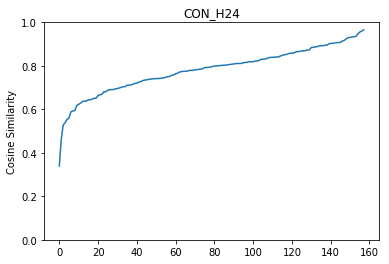

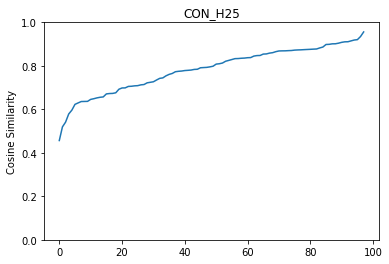

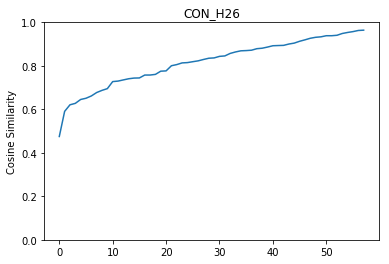

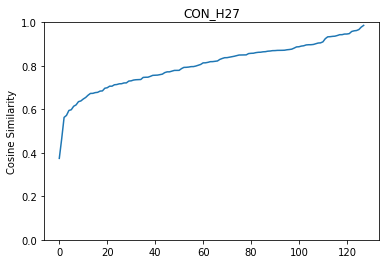

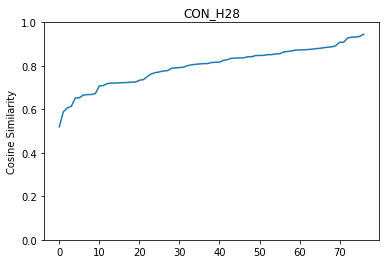

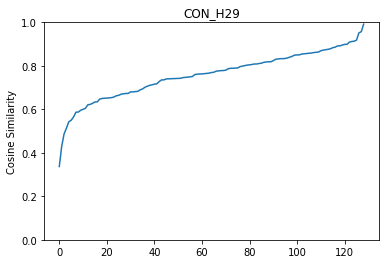

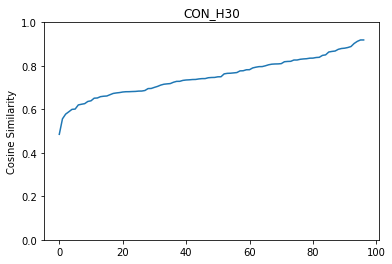

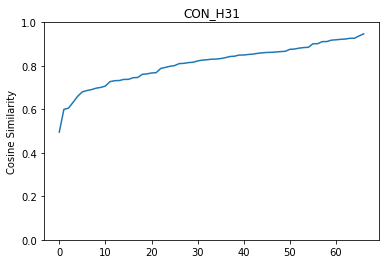

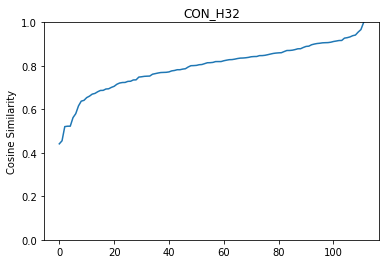

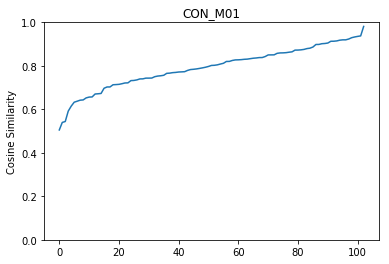

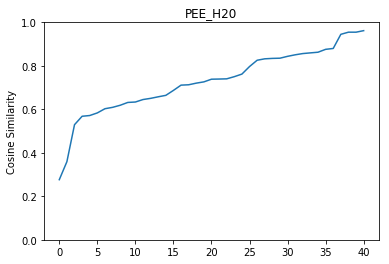

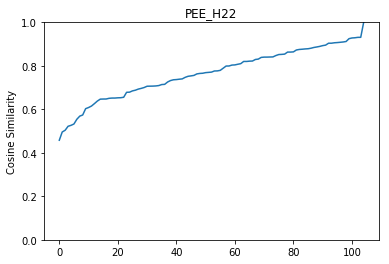

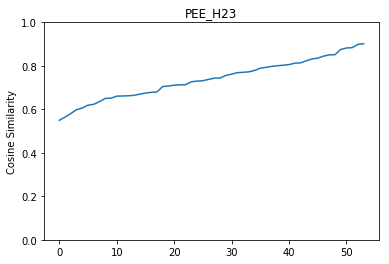

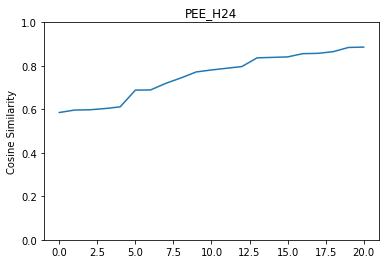

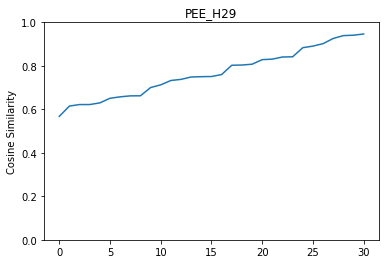

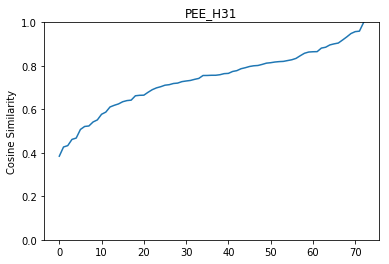

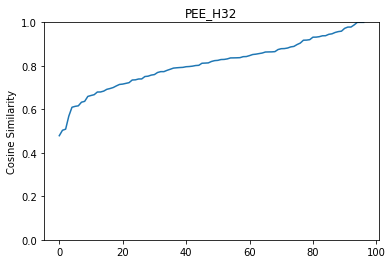

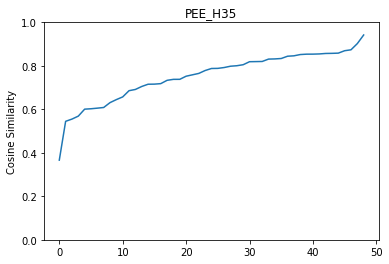

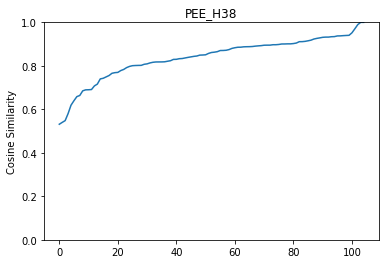

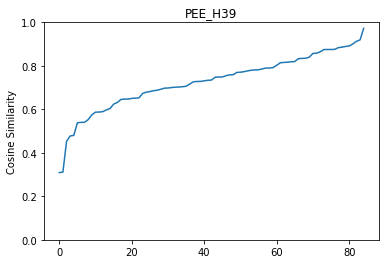

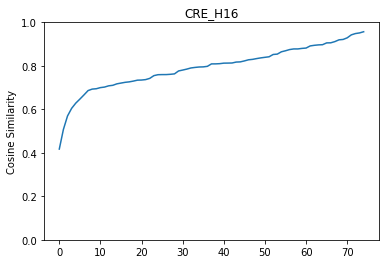

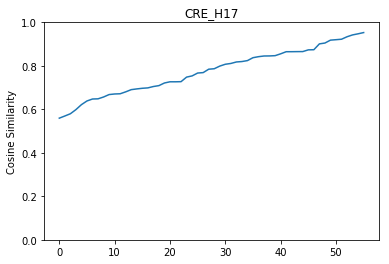

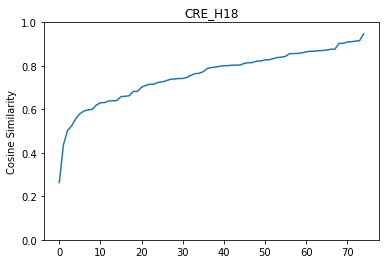

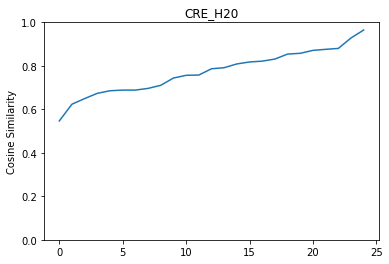

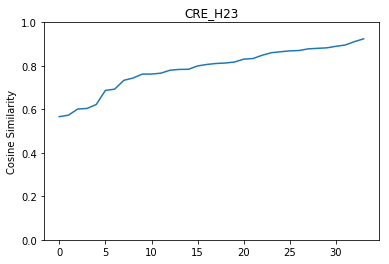

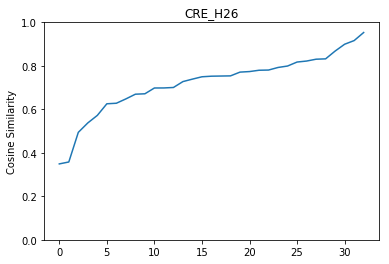

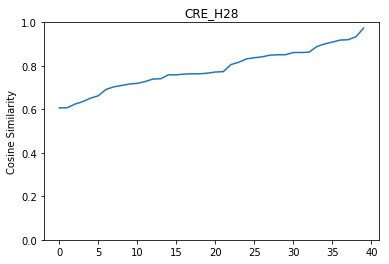

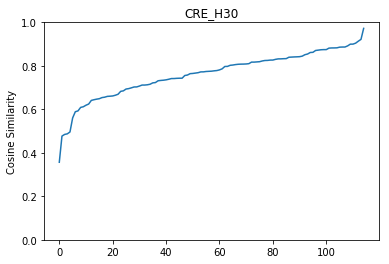

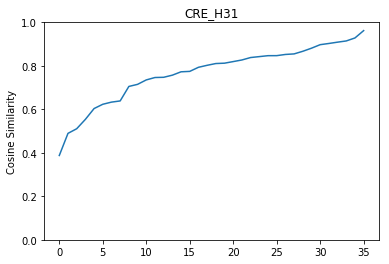

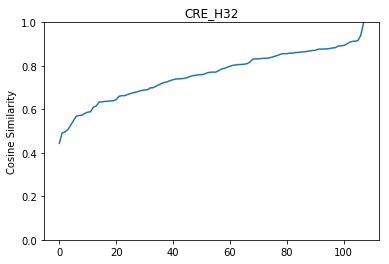

In [10]:
def graphCosSim(cosSimLists, namesList, inicio, fin):
    for i in range(inicio, fin):
        plt.plot(sorted(cosSimLists[i]))
        plt.title(namesList[i])
        plt.ylabel("Cosine Similarity")
        plt.ylim((0,1))
        plt.show()

graphCosSim(controlCosSimPRLists, controlNames, 15, 25)
graphCosSim(primEpCosSimPRLists, primEpNames, 15, 25)
graphCosSim(cronicoCosSimPRLists, cronicoNames, 15, 25)

In [12]:
def getMinCoherenceText(cosSimDicts, txtDicts, nombreEntrevist):
    minCosSim = np.nanmin(list(cosSimDicts[nombreEntrevist + "_cosSim"]["PR"].values()))
    numero = list(cosSimDicts[nombreEntrevist + "_cosSim"]["PR"].keys())[list(cosSimDicts[nombreEntrevist + "_cosSim"]["PR"].values()).index(minCosSim)]
    print("En la entrevista " + nombreEntrevist + " el menor coseno de similaridad fue " + str(round(minCosSim,3)) + " presente en la " + numero)
    print("El texto implicado es: \n")
    print("E: " + " ".join(txtDicts[nombreEntrevist + "_texto"]["E" + numero[5:]]))
    print("I: " + " ".join(txtDicts[nombreEntrevist + "_texto"]["I" + numero[5:]]))

getMinCoherenceText(primEpCosSimDicts, primEpLemSinSWTxtDicts, "PEE_M01")

En la entrevista PEE_M01 el menor coseno de similaridad fue 0.452 presente en la Dupla254
El texto implicado es: 

E: diferencia tener
I: dos aÃ±o


In [13]:
def fillCosSimNLevelDictionaries(cosSimDicts, txtDicts, namesList, nLevel):
    for name in namesList:
        cosSimDicts[name + "_cosSim"][str(nLevel)+"Level"] = {}
        k = 0
        marker = False
        vectorA = np.zeros(modelo.layer1_size)
        vectorB = np.zeros(modelo.layer1_size)
        for key, value in txtDicts[name+"_texto"].items():
            cosSimList = []
            if (len(value) > (2 * nLevel)) and (key[0] == "I"):
                for word in value:
                    if (k%(nLevel) == 0):
                        marker = not marker

                    if marker:
                        try:
                            vector = modelo[word]
                            vectorA = np.add(vectorA,vector)
                        except (NameError, KeyError):
                            pass
                    else:
                        try:
                            vector = modelo[word]
                            vectorB = np.add(vectorB,vector)
                        except (NameError, KeyError):
                            pass

                    k += 1
                    if (k%(2 * nLevel) == 0):
                        cosSimValue = cosSim(vectorA, vectorB)
                        cosSimList.append(cosSimValue)
                        vector1 = np.zeros(modelo.layer1_size)
                        vector2 = np.zeros(modelo.layer1_size)
                cosSimDicts[name + "_cosSim"][str(nLevel)+"Level"][key] = np.mean(cosSimList)

fillCosSimNLevelDictionaries(controlCosSimDicts, controlLemSinSWTxtDicts, controlNames, 5)
fillCosSimNLevelDictionaries(primEpCosSimDicts, primEpLemSinSWTxtDicts, primEpNames, 5)
fillCosSimNLevelDictionaries(cronicoCosSimDicts, cronicoLemSinSWTxtDicts, cronicoNames, 5)

fillCosSimNLevelDictionaries(controlCosSimDicts, controlLemSinSWTxtDicts, controlNames, 6)
fillCosSimNLevelDictionaries(primEpCosSimDicts, primEpLemSinSWTxtDicts, primEpNames, 6)
fillCosSimNLevelDictionaries(cronicoCosSimDicts, cronicoLemSinSWTxtDicts, cronicoNames, 6)

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `layer1_size` (Attribute will be removed in 4.0.0, use self.trainables.layer1_size instead).
  
C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `layer1_size` (Attribute will be removed in 4.0.0, use self.trainables.layer1_size instead).
  import sys
C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `layer1_size` (Attribute will be removed in 4.0.0, use self.trainables.layer1_size instead).

In [14]:
controlFinalDicts = createDicts(controlNames, "")
primEpFinalDicts = createDicts(primEpNames, "")
cronicoFinalDicts = createDicts(cronicoNames, "")

def fillFinalDicts(namesList, dataDicts, finalDicts):
    dicts = ["PR", "5Level", "6Level"]
    for dictionary in dicts:
        for name in namesList:
            lista = []
            for value in dataDicts[name+"_cosSim"][dictionary].values():
                if not np.isnan(value):
                    lista.append(value)
            if (len(lista) > 0):
                finalDicts[name]["Promedio_CosSim_" + dictionary] = np.mean(lista)
                finalDicts[name]["Minimo_CosSim_" + dictionary] = min(lista)

fillFinalDicts(controlNames, controlCosSimDicts, controlFinalDicts)
fillFinalDicts(primEpNames, primEpCosSimDicts, primEpFinalDicts)
fillFinalDicts(cronicoNames, cronicoCosSimDicts, cronicoFinalDicts)

In [15]:
controlFinalDictDF = pd.DataFrame.from_dict(controlFinalDicts, orient="index")
primEpFinalDictDF = pd.DataFrame.from_dict(primEpFinalDicts, orient="index")
cronicoFinalDictDF = pd.DataFrame.from_dict(cronicoFinalDicts, orient="index")
FinalDictDF = pd.concat([controlFinalDictDF, primEpFinalDictDF, cronicoFinalDictDF])
FinalDictDF

,Promedio_CosSim_PR,Minimo_CosSim_PR,Promedio_CosSim_5Level,Minimo_CosSim_5Level,Promedio_CosSim_6Level,Minimo_CosSim_6Level
CON_H01,0.806399,0.543424,0.994417,0.877382,0.993680,0.897583
CON_H02,0.791523,0.449337,0.993974,0.803993,0.994008,0.742529
CON_H10,0.767597,0.332418,0.981708,0.822545,0.974991,0.881335
CON_H11,0.792004,0.455781,0.993876,0.798825,0.994647,0.857107
CON_H12,0.836830,0.627332,0.993223,0.875060,0.993347,0.843478
CON_H13,0.802967,0.304318,0.993561,0.836354,0.994167,0.929099
CON_H14,0.826593,0.462773,0.994163,0.919516,0.993938,0.879787
CON_H15,0.775437,0.507965,0.995220,0.931702,0.994920,0.933895
CON_H16,0.770172,0.515033,0.991866,0.735943,0.993160,0.785914
CON_H17,0.834161,0.511147,0.991712,0.921494,0.992916,0.945379


In [16]:
primEpFinalDictDF.to_csv("C:/Users/danie/Dropbox/Proyecto Psi - Mauricio/CSV 2/Analisis Semantico PEE 2.csv")
FinalDictDF.to_csv("C:/Users/danie/Dropbox/Proyecto Psi - Mauricio/CSV 2/Analisis Semantico All 2.csv")